In [1]:
# Open my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

### Installing Dataset to Drive

In [7]:
# install_packages
install_packages = True
if install_packages:
    %pip install pandas pillow numpy scipy matplotlib wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ddb05038985156839d671282902ad2a331e11f283c95355228fe22694d1dbeff
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Get on colab lighter_authors.json
import wget
authors = wget.download("https://adm2023.s3.amazonaws.com/lighter_authors.json")

In [ ]:
# Get on colab lighter_books.json
books = wget.download("https://adm2023.s3.amazonaws.com/lighter_books.json")

In [ ]:
# Move the datasets from colab to my drive, so i can reuse it when i close the page of colab (without going to ridownload the datasets)
import shutil

# Source path
source_authors = '/content/lighter_authors.json'
source_books = '/content/lighter_books.json'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_books, destination)

In [ ]:
dest = shutil.move(source_authors, destination)

In [ ]:
# Get only the first 200.000 rows of books dataset so the ram of my colab didn't blow up
import pandas as pd
df_books = pd.read_json('/content/lighter_books.json', lines = True, nrows = 200000)

In [ ]:
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
  print(chunk.head())
  break

   id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   

                                             authors   author_name  author_id  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
2                                               None  J.K. Rowling    1077326   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   

   work_id        isbn         isbn13 asin language  ...  \
0  2809203  0439358078  9780439358071           eng  ...   
1  4640799                      

### RQ1 & RQ2


In [ ]:
# Get authors dataset on my colab
df_authors = pd.read_json('/content/lighter_authors.json', lines = True)

**[RQ1]** Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

In [ ]:
# Summary Statistics: Compute basic statistics for each variable, such as mean, median, mode, variance, standard deviation, minimum & maximum.
# Histograms: Create histograms to visualize the distribution of numerical variables.
# Bar Charts: Use bar charts for categorical variables to show the distribution of categories.
df_books.info()
df_books.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199963 entries, 0 to 199962
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         199963 non-null  int64  
 1   title                      199963 non-null  object 
 2   authors                    67568 non-null   object 
 3   author_name                199963 non-null  object 
 4   author_id                  199963 non-null  int64  
 5   work_id                    199963 non-null  int64  
 6   isbn                       199963 non-null  object 
 7   isbn13                     199963 non-null  object 
 8   asin                       199963 non-null  object 
 9   language                   199963 non-null  object 
 10  average_rating             199963 non-null  float64
 11  rating_dist                199963 non-null  object 
 12  ratings_count              199963 non-null  int64  
 13  text_reviews_count         19

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,199963.00000,1.999630e+05,1.999630e+05,199963.000000,1.999630e+05,199963.000000
mean,188388.94656,7.686039e+05,2.828280e+06,3.790865,3.349555e+04,929.407135
std,119155.38981,2.439785e+06,9.296696e+06,0.775540,2.266466e+05,4793.556750
min,2.00000,4.000000e+00,6.200000e+01,0.000000,0.000000e+00,0.000000
25%,82296.50000,9.885000e+03,1.530855e+05,3.680000,3.200000e+01,3.000000
50%,180137.00000,3.807300e+04,3.307460e+05,3.920000,2.910000e+02,23.000000
75%,290585.00000,1.357480e+05,1.519321e+06,4.130000,3.113000e+03,174.000000
max,407169.00000,2.113634e+07,8.972161e+07,5.000000,7.377351e+06,116930.000000


<Axes: ylabel='Frequency'>

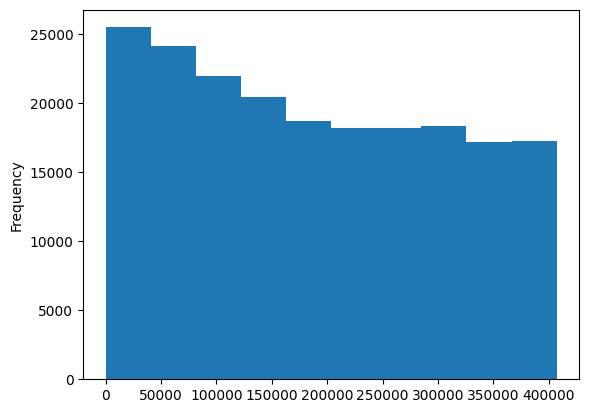

In [ ]:
df_books.id.plot.hist()

<Axes: ylabel='Frequency'>

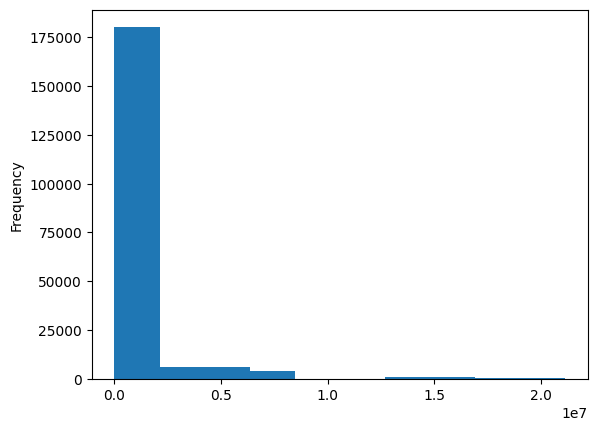

In [ ]:
df_books.author_id.plot.hist()

<Axes: ylabel='Frequency'>

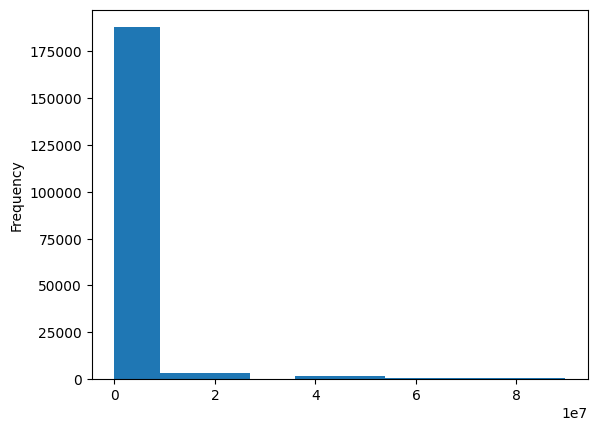

In [ ]:
df_books.work_id.plot.hist()


<Axes: ylabel='Frequency'>

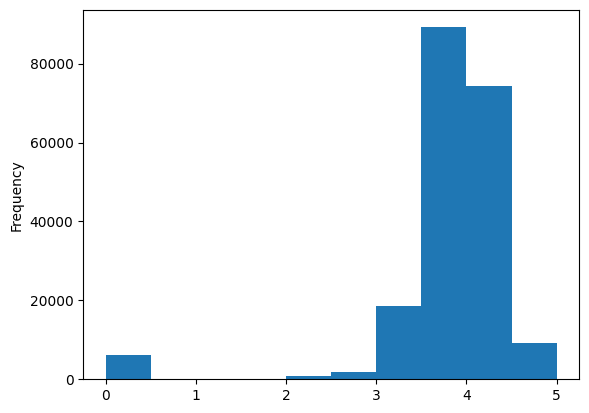

In [ ]:
df_books.average_rating.plot.hist()


<Axes: ylabel='Frequency'>

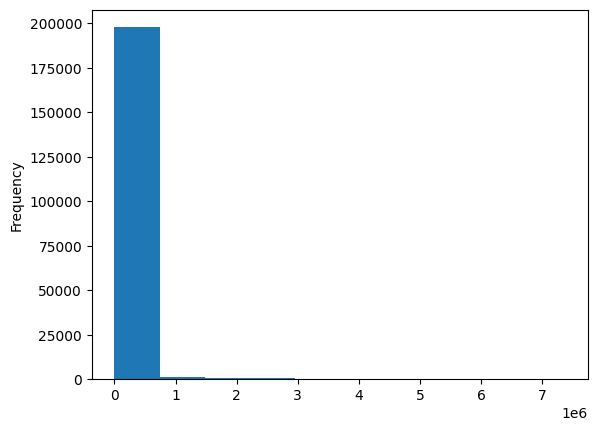

In [ ]:
df_books.ratings_count.plot.hist()


<Axes: ylabel='Frequency'>

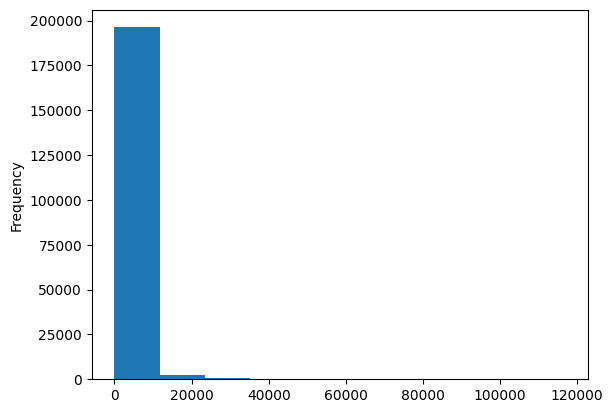

In [ ]:
df_books.text_reviews_count.plot.hist()

In [ ]:
df_books['language'].value_counts().plot(kind='bar', color='green')

NameError: ignored

In [ ]:
df_authors.info()
df_authors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


<Axes: ylabel='Frequency'>

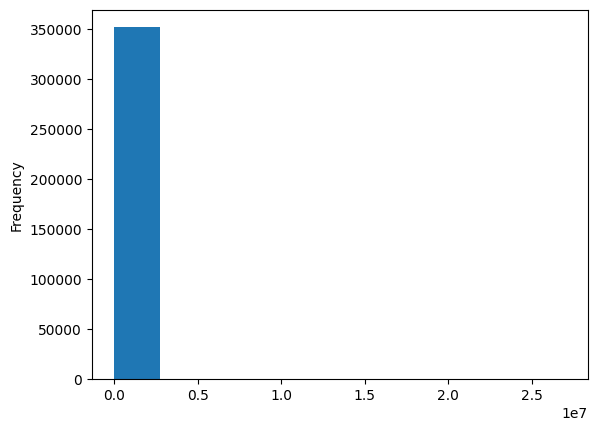

In [ ]:
df_authors.ratings_count.plot.hist()

<Axes: ylabel='Frequency'>

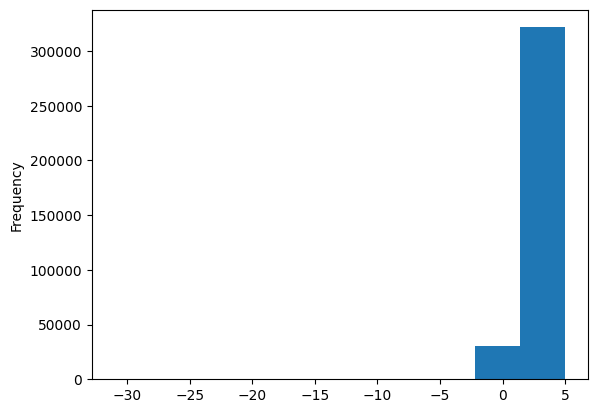

In [ ]:
df_authors.average_rating .plot.hist()

<Axes: ylabel='Frequency'>

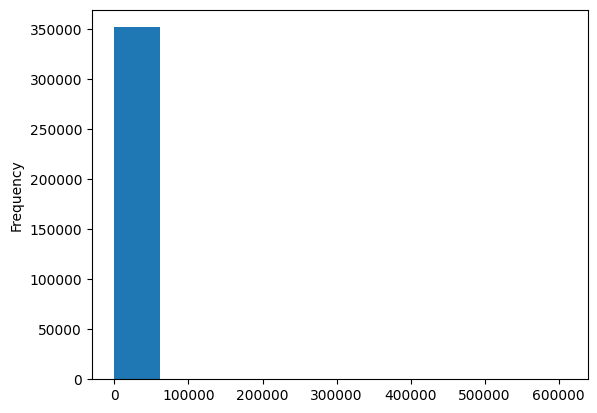

In [ ]:
df_authors.text_reviews_count.plot.hist()

<Axes: ylabel='Frequency'>

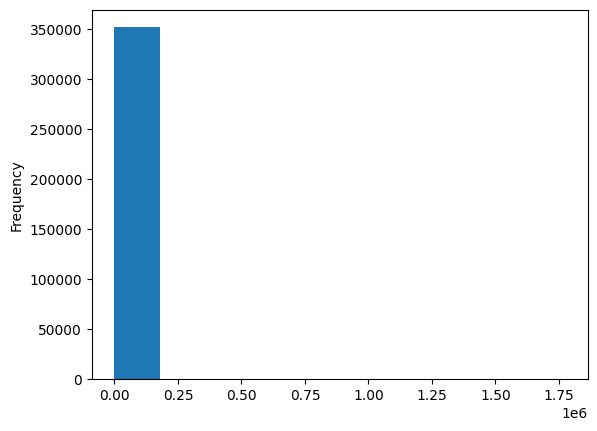

In [ ]:
df_authors.works_count.plot.hist()

<Axes: ylabel='Frequency'>

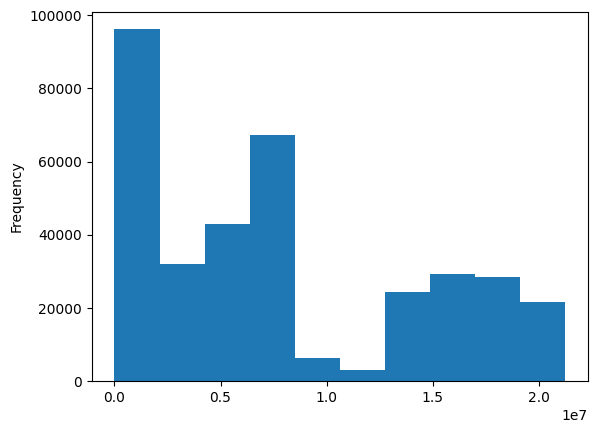

In [ ]:
df_authors.id.plot.hist()

<Axes: ylabel='Frequency'>

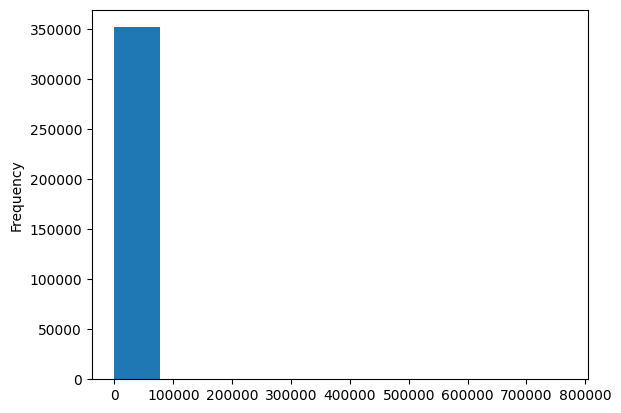

In [ ]:
df_authors.fans_count.plot.hist()

In [ ]:
#Plot the number of books for each author in descending order.
#Fai istogramma.
num_books_byauthor = df_books.groupby('author_name').size()
num_books_byauthor = num_books_byauthor.sort_values(ascending=False)
print(num_books_byauthor)

author_name
William Shakespeare    998
Anonymous              871
Stephen King           533
R.L. Stine             448
Agatha Christie        387
                      ... 
John   Kelly             1
John   Howard            1
John   Hammond           1
John   Hagan             1
西西                       1
Length: 37327, dtype: int64


In [ ]:
#Which book has the highest number of reviews?
max_ratingscount=0
title=None
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
    v=chunk[chunk.ratings_count == chunk.ratings_count.max()].head(1)
    if v.ratings_count.max() > max_ratingscount:
      max_ratingscount=v.ratings_count.max()
      title=v.title
      break
print(title)

#Result: 5236525    Harry Potter und der Stein der Weisen (Harry P...
#Name: title, dtype: object


1    Harry Potter and the Sorcerer's Stone (Harry P...
Name: title, dtype: object


In [ ]:
#Which are the top ten and ten worst books concerning the average score?
#Crea una lista dove ad ogni for aggiungi i risultati di ogni chunk,
#e poi a fine for estrai dalla lista i primi 10 e gli ultimi 10
for chunk in pd.read_json('/content/lighter_books.json', lines = True, chunksize=10000):
    sorted_ratings= chunk.sort_values(by='average_rating', ascending=False)
#Top ten concerning the average score
    print(sorted_ratings['title'].head(10))
#Worst ten concerning the average score
    print(sorted_ratings['title'].tail(10))
    break


177503    Jan's Rainbow: Stories of Hope; How Those We H...
136399    Everybody Wants to Go to Heaven: Six Steps to ...
185617               Airship Aerodynamics: Technical Manual
2694      The Travels of the Prophet Ibrahim (Quran Stor...
136320    The Collected Works Of Samuel Taylor Coleridge...
101723                             Tale of the Missing Head
136319    Sir Henry Irving: A Victorian Actor and His World
101782    Mad About The Boy: The Life And Times Of Boy G...
185535    Public Speaking: A Guide for the Engaged Commu...
185534     Public Speaking with Student CD-ROM and PowerWeb
Name: title, dtype: object
157739        Quality of Life: Concept, Policy and Practice
181610    Vision And Realisation: A Centenary History Of...
132916    Handbook for travellers in Switzerland, 1838 (...
157724    A Cat Called Max: Max and the Quiz Kids (Arch ...
18933     20 Ans De Théories Féministes Sur Le Cinéma...
142246                                     Uncompleted Past
131402    To Sla

In [ ]:
#Explore the different languages in the book’s dataset,
#providing a proper chart summarizing how these languages are distributed throughout our virtual library.



### RQ3

#### RQ3.1
Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.



In [49]:
def preprocess_data(df):
    """
    Preprocesses the input DataFrame by cleaning and transforming the data.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the data to be preprocessed.

    Returns:
        df (pandas.DataFrame): The preprocessed DataFrame after performing the following operations:
            - Drops the 'authors' column from the DataFrame.
            - Removes rows with missing values.
            - Converts all columns to string type.
            - Splits the 'publication_date' column into separate 'year', 'month', and 'day' columns based on the '-' delimiter.
            - Converts 'year' and 'month' columns to numeric type.
            - Removes rows with NaN values in 'year' and 'month'.
            - Filters the DataFrame to include records with a 'year' less than or equal to 2023.
            - Converts 'year', 'month', and 'num_pages' columns to 'Int64' type.
            - Removes rows with missing values in the 'num_pages' column.
    """
    columns_to_drop = ['authors', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'rating_dist',
       'ratings_count', 'text_reviews_count',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'series_id', 'series_name',
       'series_position', 'shelves', 'description']
    df = df.drop(columns_to_drop, axis=1)
    df.dropna(inplace=True)
    df = df.astype(str)
    df.drop_duplicates(inplace=True)

    # Split 'publication_date' into 'year' and 'month' based on '-'
    df[['year', 'month', 'day']] = df['publication_date'].str.split('-', expand=True)

    # Convert year and month to numeric
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['month'] = pd.to_numeric(df['month'], errors='coerce')
    df.dropna(inplace=True)

    df = df[df['year'] <= 2023]

    # Convert 'year', 'month' and 'num_pages' to Int64
    df['year'] = df['year'].astype('Int64')
    df['month'] = df['month'].astype('Int64')
    df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce').astype('Int64')
    df = df[pd.notnull(df['num_pages'])]

    return df


In [3]:
def RQ3(df, year):
    """
    Analyzes a DataFrame to extract insights for a specific year.

    Args:
        df (pandas.DataFrame): The input DataFrame containing book-related data.
        year (int): The specific year for which data analysis is conducted.

    Returns:
        Tuple containing the following elements:
        - number_books (int): The number of unique books published in the provided year.
        - number_pages (int): The total number of pages from all books published in the provided year.
        - prolific_month (int): The month with the highest number of books published in the provided year.
        - book_with_max_pages (str): The title of the book with the highest number of pages published in the provided year.
        - num_book_with_max_pages (int): The number of pages of the book with the highest number of pages published in the provided year.
        - books_per_month (pandas.DataFrame): DataFrame showing the count of books published per month in the provided year.

    """
    df_year = df[df['year'] == year]
    number_books = df_year['id'].nunique()
    number_pages = df_year['num_pages'].sum()
    books_per_month = df_year.groupby('month').size().reset_index(name='books_published')

    prolific_month = books_per_month[books_per_month['books_published'] == books_per_month['books_published'].max()]['month'].values[0]

    max_page_index = df_year['num_pages'].idxmax()
    num_book_with_max_pages = df_year.loc[max_page_index, 'num_pages']
    book_with_max_pages = df_year.loc[max_page_index, 'title']

    return number_books, number_pages, prolific_month, book_with_max_pages, num_book_with_max_pages, books_per_month



#### RQ3.2
Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [4]:
def build_df(df):
    """
    Builds a summary DataFrame containing yearly book-related statistics.

    Args:
        df (pandas.DataFrame): The input DataFrame containing book-related data for different years.

    Returns:
        pandas.DataFrame: A summary DataFrame with yearly statistics based on the provided data. The DataFrame includes the following columns:
        - 'year': The year corresponding to the statistics.
        - 'number_books': The total number of unique books published in each year.
        - 'number_pages': The total number of pages from all books published in each year.
        - 'prolific_month': The month with the highest number of books published in each year.
        - 'book_with_max_pages': The title of the book with the highest number of pages published in each year.
        - 'num_book_with_max_pages': The number of pages of the book with the highest page count published in each year.
        - Columns '1' to '12' (representing months): The count of books published per month in each year.

    Note:
        This function utilizes the 'RQ3' function to compute statistics for each year and creates a summary DataFrame. Ensure the input DataFrame 'df' contains relevant columns such as 'year', 'id', 'num_pages', 'month', and 'title' for accurate analysis.
    """

    years = df['year'].unique()
    new_df = pd.DataFrame(columns=['year', 'number_books', 'number_pages', 'prolific_month', 'book_with_max_pages', 'num_book_with_max_pages', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

    for i in range(len(years)):
        number_books, number_pages, prolific_month, book_with_max_pages, num_book_with_max_pages, books_per_month = RQ3(df, years[i])

        new_row = {'year': years[i],
                   'number_books': number_books,
                   'number_pages': number_pages,
                   'prolific_month': prolific_month,
                   'book_with_max_pages': book_with_max_pages,
                   'num_book_with_max_pages': num_book_with_max_pages}

        # Add columns for books published per month
        for index, row in books_per_month.iterrows():
            month = row['month']
            books_published = row['books_published']
            new_row[str(month)] = books_published

        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

    new_df = new_df.fillna(0)
    new_df = new_df.sort_values(by=['year'])
    return new_df


In [5]:
def merge_dataframes(new_df1, new_df2):
    """
    Merges and consolidates two DataFrames containing book-related statistics into a single comprehensive DataFrame.

    Args:
        new_df1 (pandas.DataFrame): The first DataFrame containing book-related statistics.
        new_df2 (pandas.DataFrame): The second DataFrame containing book-related statistics.

    Returns:
        pandas.DataFrame: A merged DataFrame consolidating statistics from 'new_df1' and 'new_df2'. The merged DataFrame includes columns representing combined statistics, such as:
        - 'year': The year corresponding to the statistics.
        - 'number_books': Total number of unique books published for each year in both DataFrames.
        - 'number_pages': Total number of pages from all books published for each year in both DataFrames.
        - 'prolific_month': The most prolific month in each year based on combined data.
        - 'book_with_max_pages': The title of the book with the highest number of pages published in each year from both DataFrames.
        - 'num_book_with_max_pages': The number of pages of the book with the highest page count in each year from both DataFrames.
        - Columns '1' to '12' (representing months): Total count of books published per month in each year from both DataFrames.

    Note:
        This function performs an outer merge of 'new_df1' and 'new_df2' DataFrames based on the 'year' column. It then consolidates and computes combined statistics to generate a single DataFrame.
    """

    merged_df = pd.merge(new_df1, new_df2, on='year', how='outer', suffixes=('_df1', '_df2'))

    merged_df['number_books'] = merged_df['number_books_df1'].fillna(0) + merged_df['number_books_df2'].fillna(0)
    merged_df['number_pages'] = merged_df['number_pages_df1'].fillna(0) + merged_df['number_pages_df2'].fillna(0)

    merged_df['book_with_max_pages'] = np.where(
        merged_df['num_book_with_max_pages_df1'].fillna(0) >= merged_df['num_book_with_max_pages_df2'].fillna(0),
        merged_df['book_with_max_pages_df1'],
        merged_df['book_with_max_pages_df2']
    )

    merged_df['num_book_with_max_pages'] = merged_df[['num_book_with_max_pages_df1', 'num_book_with_max_pages_df2']].max(axis=1)

    months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    for month in months:
        merged_df[month] = merged_df[month + '_df1'].fillna(0) + merged_df[month + '_df2'].fillna(0)

    merged_df['prolific_month'] = merged_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].idxmax(axis=1)

    cols_to_drop = [col for col in merged_df.columns if '_df1' in col or '_df2' in col]
    merged_df.drop(columns=cols_to_drop, inplace=True)

    columns_to_convert = ['number_books', 'number_pages', 'prolific_month', 'num_book_with_max_pages', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

    merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(int)

    merged_df = merged_df.sort_values(by=['year'])

    return merged_df


In [10]:
# Define the chunk size
chunk_size = 10000

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)

is_first = True
for chunk in json_reader:
    if is_first:
        main = preprocess_data(chunk)
        main = build_df(main)
        is_first = False

    current = preprocess_data(chunk)
    current = build_df(current)
    main = merge_dataframes(main, current)

<ipython-input-2-e0c8be33e35c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('Int64')
<ipython-input-2-e0c8be33e35c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('Int64')


In [31]:
main.to_pickle('books_data_final.pkl')

In [32]:
import shutil

# Source path
source_books = '/content/books_data_final.pkl'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_books, destination)

In [11]:
main.head(10)

,year,number_books,number_pages,book_with_max_pages,num_book_with_max_pages,1,2,3,4,5,6,7,8,9,10,11,12,prolific_month
0,1,11,2923,"The Cambridge History of Russia, Vol 2",806,6,2,1,1,0,1,0,0,0,0,0,0,1
1,2,10,884,The Coach's Wife,270,0,1,1,2,0,0,2,0,0,3,0,1,10
2,3,2,404,"Sprängaren (Annika Bengtzon, #4)",376,0,1,0,0,1,0,0,0,0,0,0,0,2
3,4,1,100,These Peripheries,100,0,0,0,1,0,0,0,0,0,0,0,0,4
4,5,2,471,The Killer App,366,0,0,1,0,1,0,0,0,0,0,0,0,3
5,6,3,327,قتلة,192,0,0,0,0,1,1,0,0,0,1,0,0,5
6,8,5,869,The Electric Chair; Journals of H.H. The Most ...,474,0,0,0,0,0,0,0,3,2,0,0,0,8
7,9,9,1772,Songs of Milkweed; A Gift From the Fields I,715,0,0,2,0,1,1,0,0,2,1,1,1,3
8,10,5,726,Rogue Wave,244,1,1,0,0,0,0,0,0,0,2,1,0,10
9,11,15,2802,Alltför nära,404,0,1,1,1,1,1,2,1,1,1,3,2,11


In [12]:
main.tail(10)

,year,number_books,number_pages,book_with_max_pages,num_book_with_max_pages,1,2,3,4,5,6,7,8,9,10,11,12,prolific_month
350,2014,301765,86088056,Fermata Qt8 - Storie Ripensate in Metropolitana,10000000,30819,22159,24035,26452,55515,26871,25744,21680,22885,18810,14580,12215,5
351,2015,77533,21929604,Buddenbrooks,109980,13297,10930,11508,10114,7095,5476,3799,3725,4300,3642,2246,1401,1
352,2016,5964,1827261,Homestuck,8124,1567,888,623,553,441,329,324,258,312,271,192,206,1
353,2017,1916,574768,Cuentos completos 1880 -1903 [Estuche],5000,209,182,171,187,212,132,122,150,118,181,149,103,5
354,2018,2697,898843,Theory of Knowledge (Tok) (Student Book and Et...,9999,137,464,107,612,210,80,145,158,148,172,256,208,4
355,2019,1096,336852,Visions of America: A History of the United St...,9998,297,165,54,86,77,49,74,82,43,58,46,65,1
356,2020,648,199547,Negotiating and Drafting Office Leases,3260,79,40,71,35,51,71,78,42,52,62,35,32,1
357,2021,153,45600,Policing,1736,55,21,16,15,14,9,5,5,5,4,0,4,1
358,2022,7,2062,Weltgesellschaft: Raum - Kommunikation - Herrs...,500,2,2,0,2,1,0,0,0,0,0,0,0,1
359,2023,2,713,Apocalypse,463,0,0,0,0,0,0,0,0,2,0,0,0,9


#### RQ3.3

Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.



In [ ]:
chunk_size = 100

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)
df = next(json_reader)

In [ ]:
def get_yearly_stats(year, data):
    year_data = data[data['year'] == year]
    num_books = year_data.shape[0]
    total_pages = year_data['num_pages'].sum()
    prolific_month = calendar.month_name[year_data['month'].mode()[0]]
    longest_book = year_data['num_pages'].max()
    return {
        'Year': year,
        'Number of Books Published': num_books,
        'Total Pages Written': total_pages,
        'Most Prolific Month': prolific_month,
        'Longest Book Written': longest_book
    }


# Your provided preprocessing steps
# ... (Call preprocess_data function here)
df_preprocessed = preprocess_data(df)
# Assuming df_preprocessed is the preprocessed DataFrame

# Get the range of years after preprocessing
min_year = df_preprocessed['year'].min()
max_year = df_preprocessed['year'].max()

# Generating statistics for the available years after preprocessing
years = range(min_year, max_year + 1)
yearly_statistics = [get_yearly_stats(year, df_preprocessed) for year in years]

# Creating a DataFrame from the generated statistics
statistics_df = pd.DataFrame(yearly_statistics)
statistics_df.set_index('Year', inplace=True)

# Displaying the statistics DataFrame
print(statistics_df)

KeyError: ignored

As it can be seen, chatgpt can not solve the problem, it keeps giving the same error.

### RQ4

#### RQ4.1
You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_authors.json', lines=True)

In [34]:
df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [35]:
columns_to_drop = ['text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'gender', 'image_url', 'about',
       'fans_count']
df = df.drop(columns=columns_to_drop)
df['name'] = df['name'].str.lower().str.replace(r'[_\,]', '', regex=True)
df['name'] = df['name'].str.replace(r'\s+', ' ', regex=True)


In [36]:
# Find duplicated names
duplicated_names = df[df.duplicated(subset='name', keep=False)]

# Get a list of names that are duplicated
list_of_duplicated_names = duplicated_names['name'].unique()

drop_ids = []
for name in list_of_duplicated_names:
    # Find duplicated rows for a particular name and sort by ratings_count
    duplicated_name_rows = df[df['name'] == name].sort_values('average_rating', ascending=False)

    # Identify the duplicated rows after the first one and get their IDs
    drop_ids.extend(duplicated_name_rows.iloc[1:]['id'].tolist())

# Filter the DataFrame to remove rows with IDs present in drop_ids
df = df[~df['id'].isin(drop_ids)]


In [29]:
df.to_pickle('authors_data_final.pkl')

In [33]:
import shutil

# Source path
source_authors = '/content/authors_data_final.pkl'

# Destination path
destination = '/content/drive/MyDrive/Dataset HW2'

# Move the content of
# source to destination
dest = shutil.move(source_authors, destination)

In [10]:
df_authors = pd.read_pickle('/content/drive/MyDrive/Dataset HW2/authors_data_final.pkl')

#### RQ4.2
Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [37]:
def get_books_of_the_author(chunk, list_of_authors_ids, d):
    for index, row in chunk.iterrows():
        author_id = row['author_id']
        if author_id in list_of_authors_ids:
            book = row['title']
            if author_id not in d:
                d[author_id] = [book]
            else:
                d[author_id].append(book)

In [38]:
top_author_ids = df.sort_values(by="average_rating", ascending=False).head(20)['id'].values.tolist()

In [39]:
import pandas as pd
import numpy as np
# Define the chunk size (adjust as needed)
chunk_size = 10000  # This will read 100,000 rows at a time

# Create an iterator for reading the JSON file in chunks
json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)
list_of_authors_ids = top_author_ids
d = {}
# Initialize an empty list to hold the processed dataframes

is_first = True
# Iterate through the JSON file in chunks
for chunk in json_reader:
    get_books_of_the_author(chunk, list_of_authors_ids=list_of_authors_ids, d=d)


In [40]:
d

{4109013: ['Continuation & Additions to the History of Bradford and Its Parish'],
 4104692: ['Mightnight Multiverse',
  'Multiverse Clique',
  'Reverse of Gravity',
  'the Reverse of Gravity'],
 4108151: ['The River That Disappeared', 'The Willow Tree', 'A Lazy Day']}

#### RQ4.3
What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [41]:
max_length_book = 0
max_book = str()
for key, value in d.items():
  for book in value:
    if len(book) > max_length_book:
      max_book = book
      max_length_book = len(book)

In [42]:
max_book

'Continuation & Additions to the History of Bradford and Its Parish'

#### RQ4.4
What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [50]:
import pandas as pd

# Define the chunk size (adjust as needed)
chunk_size = 100000

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)

longest_book_overall = ['', '']
shortest_book_overall = ['', '']
max_length = 0
min_length = float('inf')
is_first = True

for chunk in json_reader:
    chunk = preprocess_data(chunk)
    for index, row in chunk.iterrows():
        title_length = len(row['title'])

        if title_length > max_length:
            longest_book_overall[0] = row['author_id']
            longest_book_overall[1] = row['title']
            max_length = title_length

        if title_length < min_length:
            shortest_book_overall[0] = row['author_id']
            shortest_book_overall[1] = row['title']
            min_length = title_length

# Print the results
print(f"Longest Book - Author ID: {longest_book_overall[0]}, Title: {longest_book_overall[1]}")
print(f"Shortest Book - Author ID: {shortest_book_overall[0]}, Title: {shortest_book_overall[1]}")


Longest Book - Author ID: 7545655, Title: A Commentary and Review of Montesquieu's Spirit of Laws, Prepared for Press from the Original Manuscript in the Hands of the Publisher (1811): To Which Are Annexed, Observations on the Thirty-First Book, by the Late M. Condorcet. and Two Letters of Hel...
Shortest Book - Author ID: 1203, Title: a


In [51]:
chunk_size = 100000

json_reader = pd.read_json('/content/drive/MyDrive/Dataset HW2/lighter_books.json', lines=True, chunksize=chunk_size)

some_df = next(json_reader)
some_df[some_df['author_id']==1203]

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
12070,18484,Campbell's Soup Boxes,"[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,19891,3901935088,9783901935084,,,4.00,5:0|4:1|3:0|2:0|1:0|total:1,1,0,2001-08-15,2001-08-15,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Galerie Thaddaeus Ropac,120,,,,"[{'name': 'to-read', 'count': 5}]",
20528,31818,The Philosophy of Andy Warhol (From A to B and...,None,Andy Warhol,1203,1283844,0156717204,9780156717205,,eng,3.77,5:13450|4:10201|3:8190|2:3125|1:2569|total:37535,37535,493,1977-04-06,1975,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Mariner Books,272,,,,"[{'name': 'to-read', 'count': 39957}, {'name':...",<b>A loosely formed autobiography by Andy Warh...
27256,43604,Philosophy Of Andy Warhol A To B,None,Andy Warhol,1203,1283844,0118905015,9780118905015,,,3.77,5:13450|4:10201|3:8192|2:3125|1:2569|total:37537,37537,493,,1975,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 39957}, {'name':...",<b>A loosely formed autobiography by Andy Warh...
27257,43605,Warhol's World,"[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,43029,3865212417,9783865212412,,,4.00,5:4|4:1|3:2|2:1|1:0|total:8,8,0,2006-04-01,2006-04-01,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Steidl,428,,,,"[{'name': 'to-read', 'count': 8}]",The power in Warhol's portraits stems in part ...
30331,48672,I'll Be Your Mirror: The Selected Interviews,"[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,47615,078671364X,9780786713646,,eng,3.84,5:102|4:103|3:84|2:26|1:6|total:321,321,11,2004-07-07,2004-06-30,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Da Capo Press,320,,,,"[{'name': 'to-read', 'count': 752}, {'name': '...",The Question-and-Answer interview was one of A...
30864,49595,a,None,Andy Warhol,1203,1451900,0802135536,9780802135537,,,3.39,5:61|4:48|3:70|2:27|1:26|total:232,232,22,1998-02-17,1979-11-12,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Grove Press,384,,,,"[{'name': 'to-read', 'count': 545}, {'name': '...","Conceptually unique, hilarious, and frightenin..."
58809,98162,The Andy Warhol Diaries,"[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,366428,0517069164,9780517069165,,,3.89,5:844|4:827|3:642|2:154|1:53|total:2520,2520,144,1991-05-04,1989,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Random House Value Publishing,0,,,,"[{'name': 'to-read', 'count': 4289}, {'name': ...","For a moment in 1990, New York's glitterati de..."
58812,98166,Diaries,None,Andy Warhol,1203,366428,0330315242,9780330315241,,,3.89,5:844|4:827|3:642|2:154|1:53|total:2520,2520,144,,1989,,,https://s.gr-assets.com/assets/nophoto/book/11...,,,,,,"[{'name': 'to-read', 'count': 4289}, {'name': ...",„Dnevnici“ Endija Vorhola su izdati daleke 198...
59976,100474,"""Giant"" Size","[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,96874,071484540X,9780714845401,,,4.42,5:143|4:58|3:21|2:6|1:4|total:232,232,10,2006-02-21,2006-02-21,Hardcover,,https://s.gr-assets.com/assets/nophoto/book/11...,Phaidon Press,624,,,,"[{'name': 'to-read', 'count': 287}, {'name': '...","Dave Hickey, is a spectacular visual biography..."
76412,130940,POPism: The Warhol Sixties,"[{'id': '1203', 'name': 'Andy Warhol', 'role':...",Andy Warhol,1203,382424,0156031116,9780156031110,,eng,4.09,5:702|4:708|3:363|2:62|1:14|total:1849,1849,103,2006-09-05,1980,Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Mariner Books,416,,,,"[{'name': 'to-read', 'count': 2409}, {'name': ...","Anecdotal, funny, frank, <i>POPism</i> is Warh..."
